# <span style="color: #2E86C1;">Object Detection with YOLOv10 on Rock, Paper, Scissors Dataset</span>

<p style="font-size: 16px; line-height: 1.6;">
This notebook demonstrates the process of training and evaluating a YOLOv10 model for object detection using the Rock, Paper, Scissors dataset from Roboflow. The key steps include:
</p>

<ol style="font-size: 16px; line-height: 1.6;">
  <li><strong>Mounting Google Drive</strong>: Accessing files stored in Google Drive.</li>
  <li><strong>Installing Required Libraries</strong>: Installing necessary Python libraries such as <code>supervision</code>, <code>ultralytics</code>, <code>roboflow</code>, and <code>yolov10</code>.</li>
  <li><strong>Importing Libraries</strong>: Importing essential libraries for data handling, model training, and visualization.</li>
  <li><strong>Setting Up Environment</strong>: Defining the current working directory and preparing the environment.</li>
  <li><strong>Downloading Model Weights</strong>: Fetching the pre-trained YOLOv10 model weights.</li>
  <li><strong>Downloading Dataset</strong>: Downloading the Rock, Paper, Scissors dataset from Roboflow.</li>
  <li><strong>Training the Model</strong>: Training the YOLOv10 model on the dataset.</li>
  <li><strong>Displaying Training Results</strong>: Visualizing the training results, including confusion matrix and training metrics.</li>
  <li><strong>Evaluating the Model</strong>: Evaluating the trained model on the validation set.</li>
  <li><strong>Making Predictions</strong>: Using the trained model to make predictions on test images and a single image.</li>
  <li><strong>Processing Video</strong>: Applying the model to a video to detect objects frame by frame and saving the results.</li>
</ol>

<p style="font-size: 16px; line-height: 1.6;">
  <strong>Key Achievements</strong>:
  <ul>
    <li>Achieved <span style="color: #28B463;">mAP50: 0.945</span> and <span style="color: #28B463;">mAP50-95: 0.732</span> on the validation dataset, showcasing the model's high accuracy and robustness.</li>
  </ul>
</p>

<p style="font-size: 16px; line-height: 1.6;">
By following these steps, you will learn how to implement an object detection pipeline using YOLOv10 and evaluate its performance on a custom dataset.
</p>


# Mount Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install Required Libraries


In [ ]:
!pip install -q supervision
!pip install -q ultralytics
!pip install -q roboflow
!pip install -q git+https://github.com/THU-MIG/yolov10.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 560.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Import Libraries


In [ ]:
import os
from roboflow import Roboflow
from IPython.display import Image
from ultralytics import YOLOv10
import cv2
import matplotlib.pyplot as plt
import glob
from IPython.display import Image, display

# Get Current Working Directory


In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cp -r /content/drive/MyDrive/Ex_03_OD_Yolov10/S_Model/1/runs /content

# Download YOLOv10 Model Weights


In [ ]:
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt

# Download Dataset from Roboflow


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov9")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov9:: 100%|██████████| 14682/14682 [00:02<00:00, 6679.40it/s]


# Display a Sample Image from the Dataset


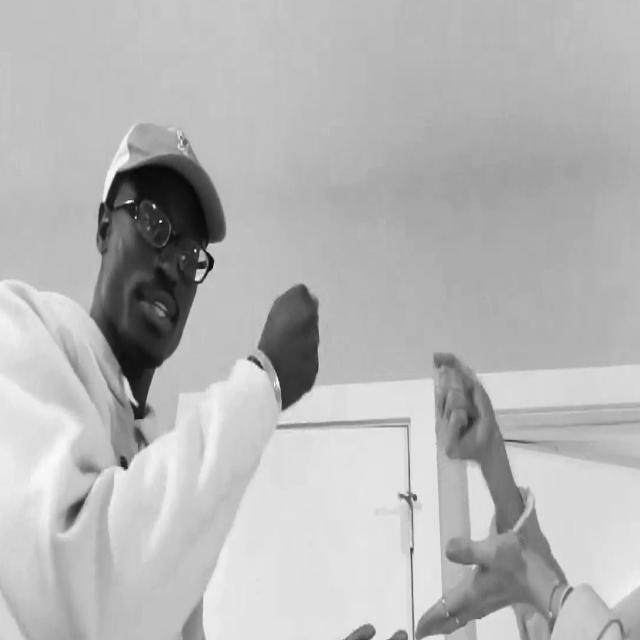

In [ ]:
Image(filename = f"{HOME}/datasets/rock-paper-scissors-14/train/images/0009_png.rf.f1b141024a84cc84093beaed741917c2.jpg", height=300)

# Train the YOLOv10 Model


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=/content/weights/yolov10s.pt data={dataset.location}/data.yaml epochs=15 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.80 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10s.pt, data=/content/datasets/rock-paper-scissors-14/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, 

# List Training Results


In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1724338462.173be4b39679.1651.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2020.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2021.jpg  weights
P_curve.png					    train_batch2022.jpg
PR_curve.png					    train_batch2.jpg


# Display Confusion Matrix


/content


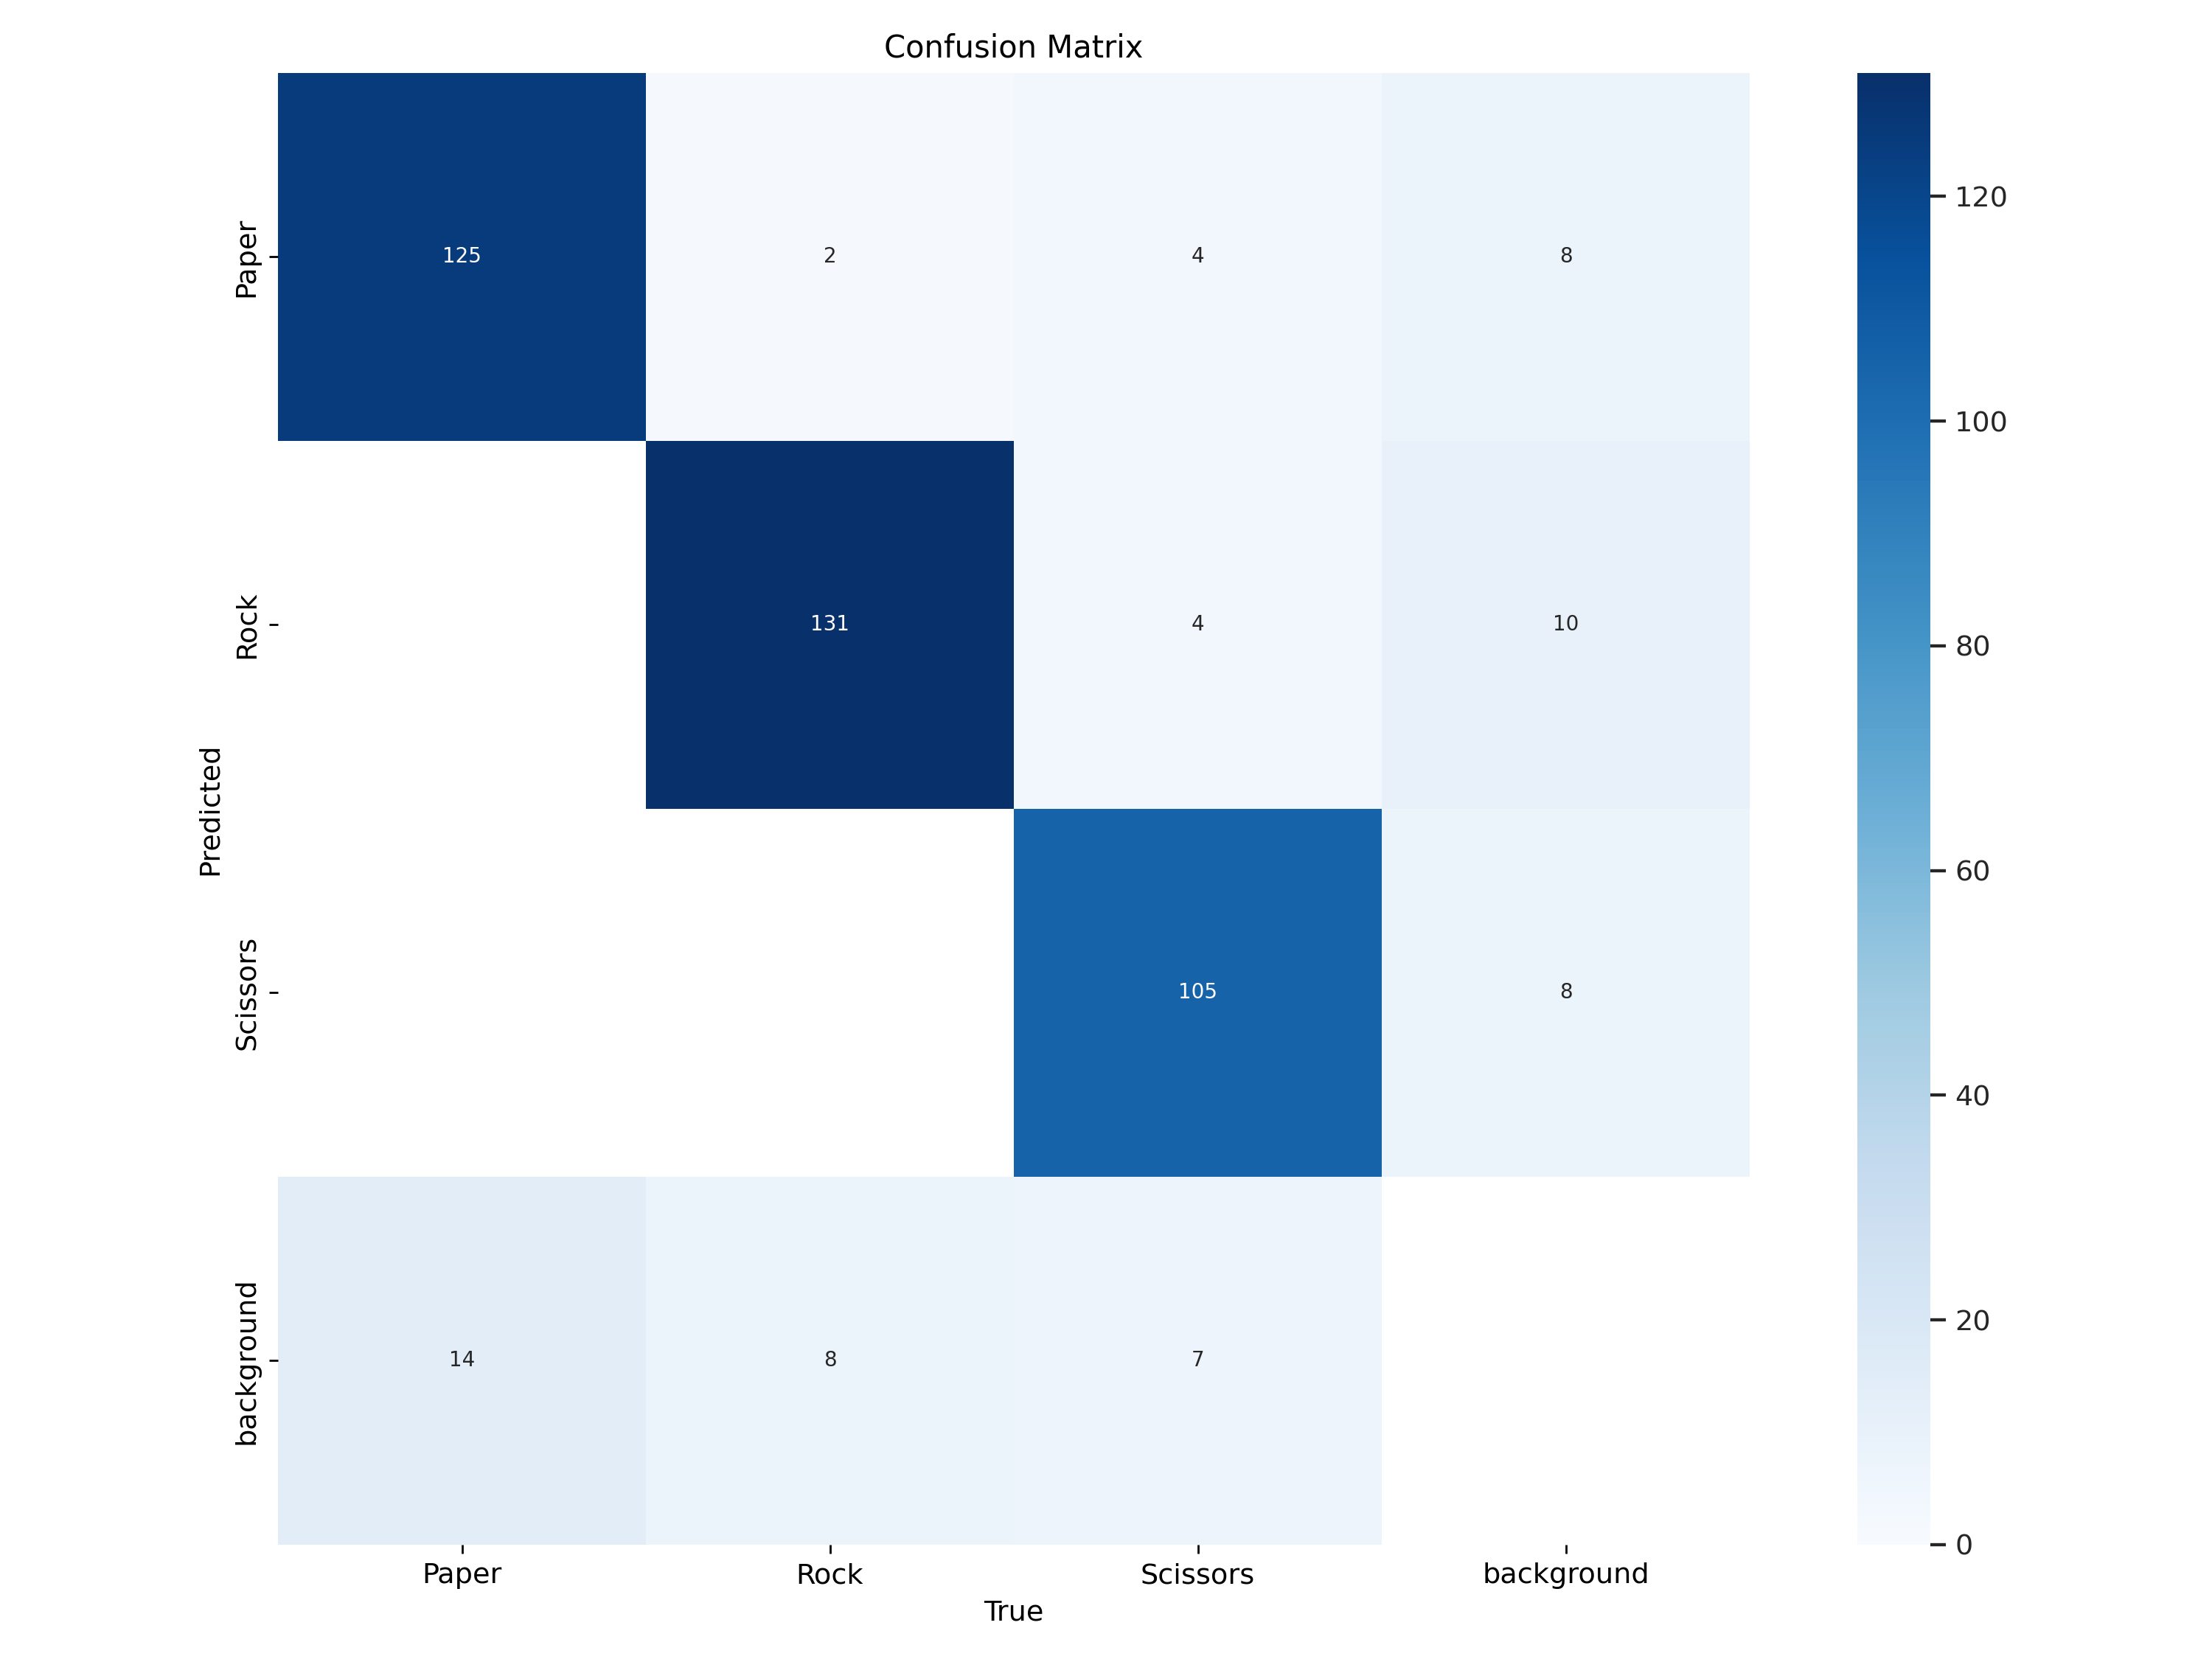

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

# Display Training Results


/content


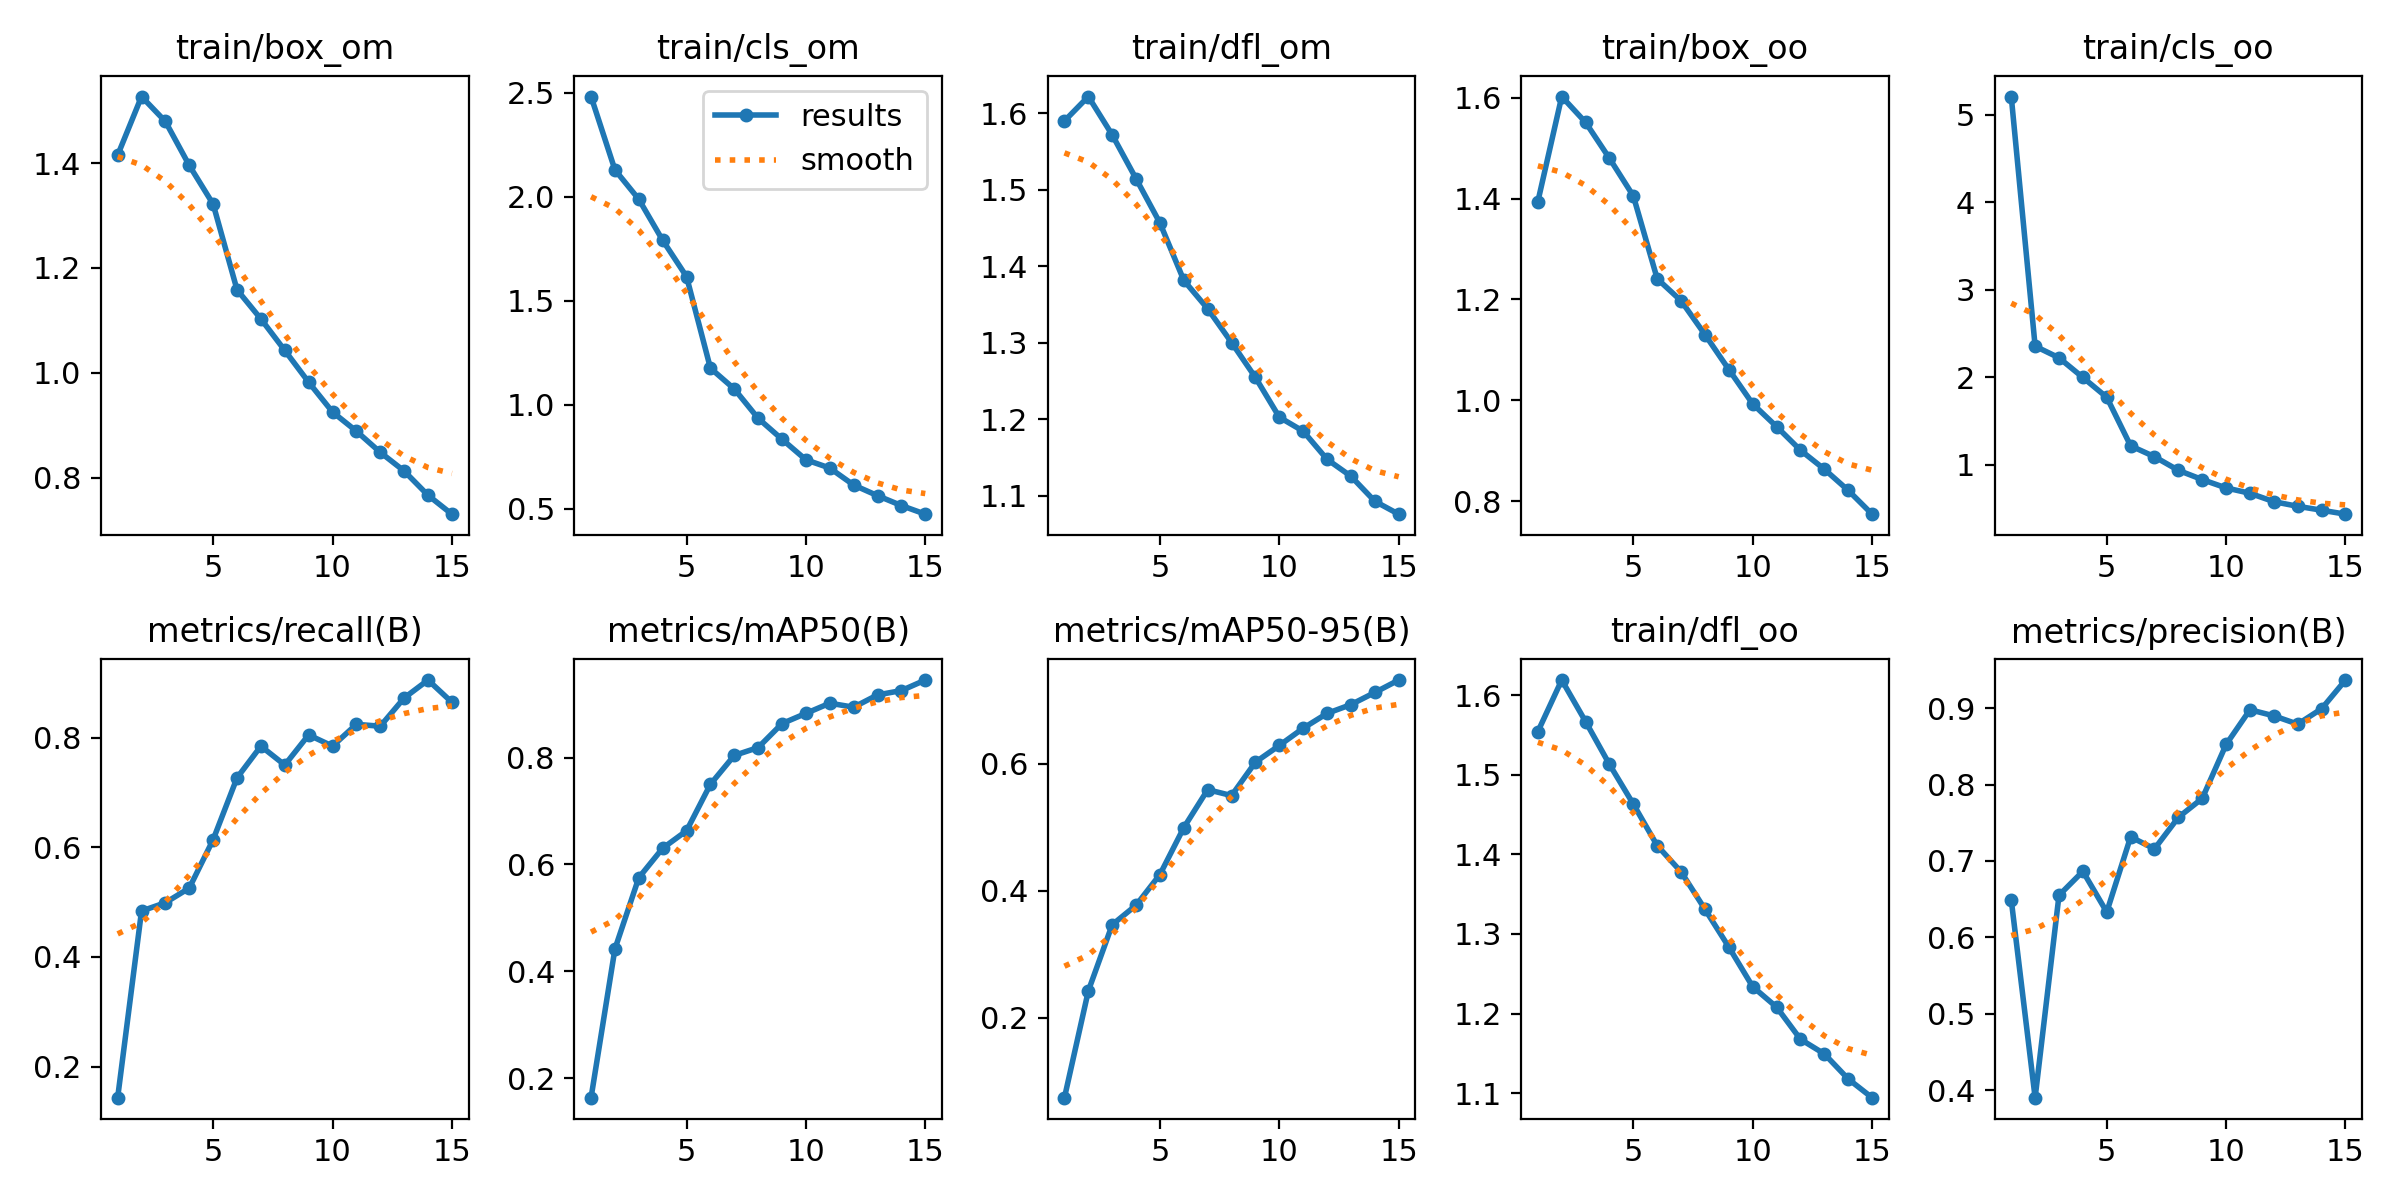

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# Display Validation Batch Predictions


/content


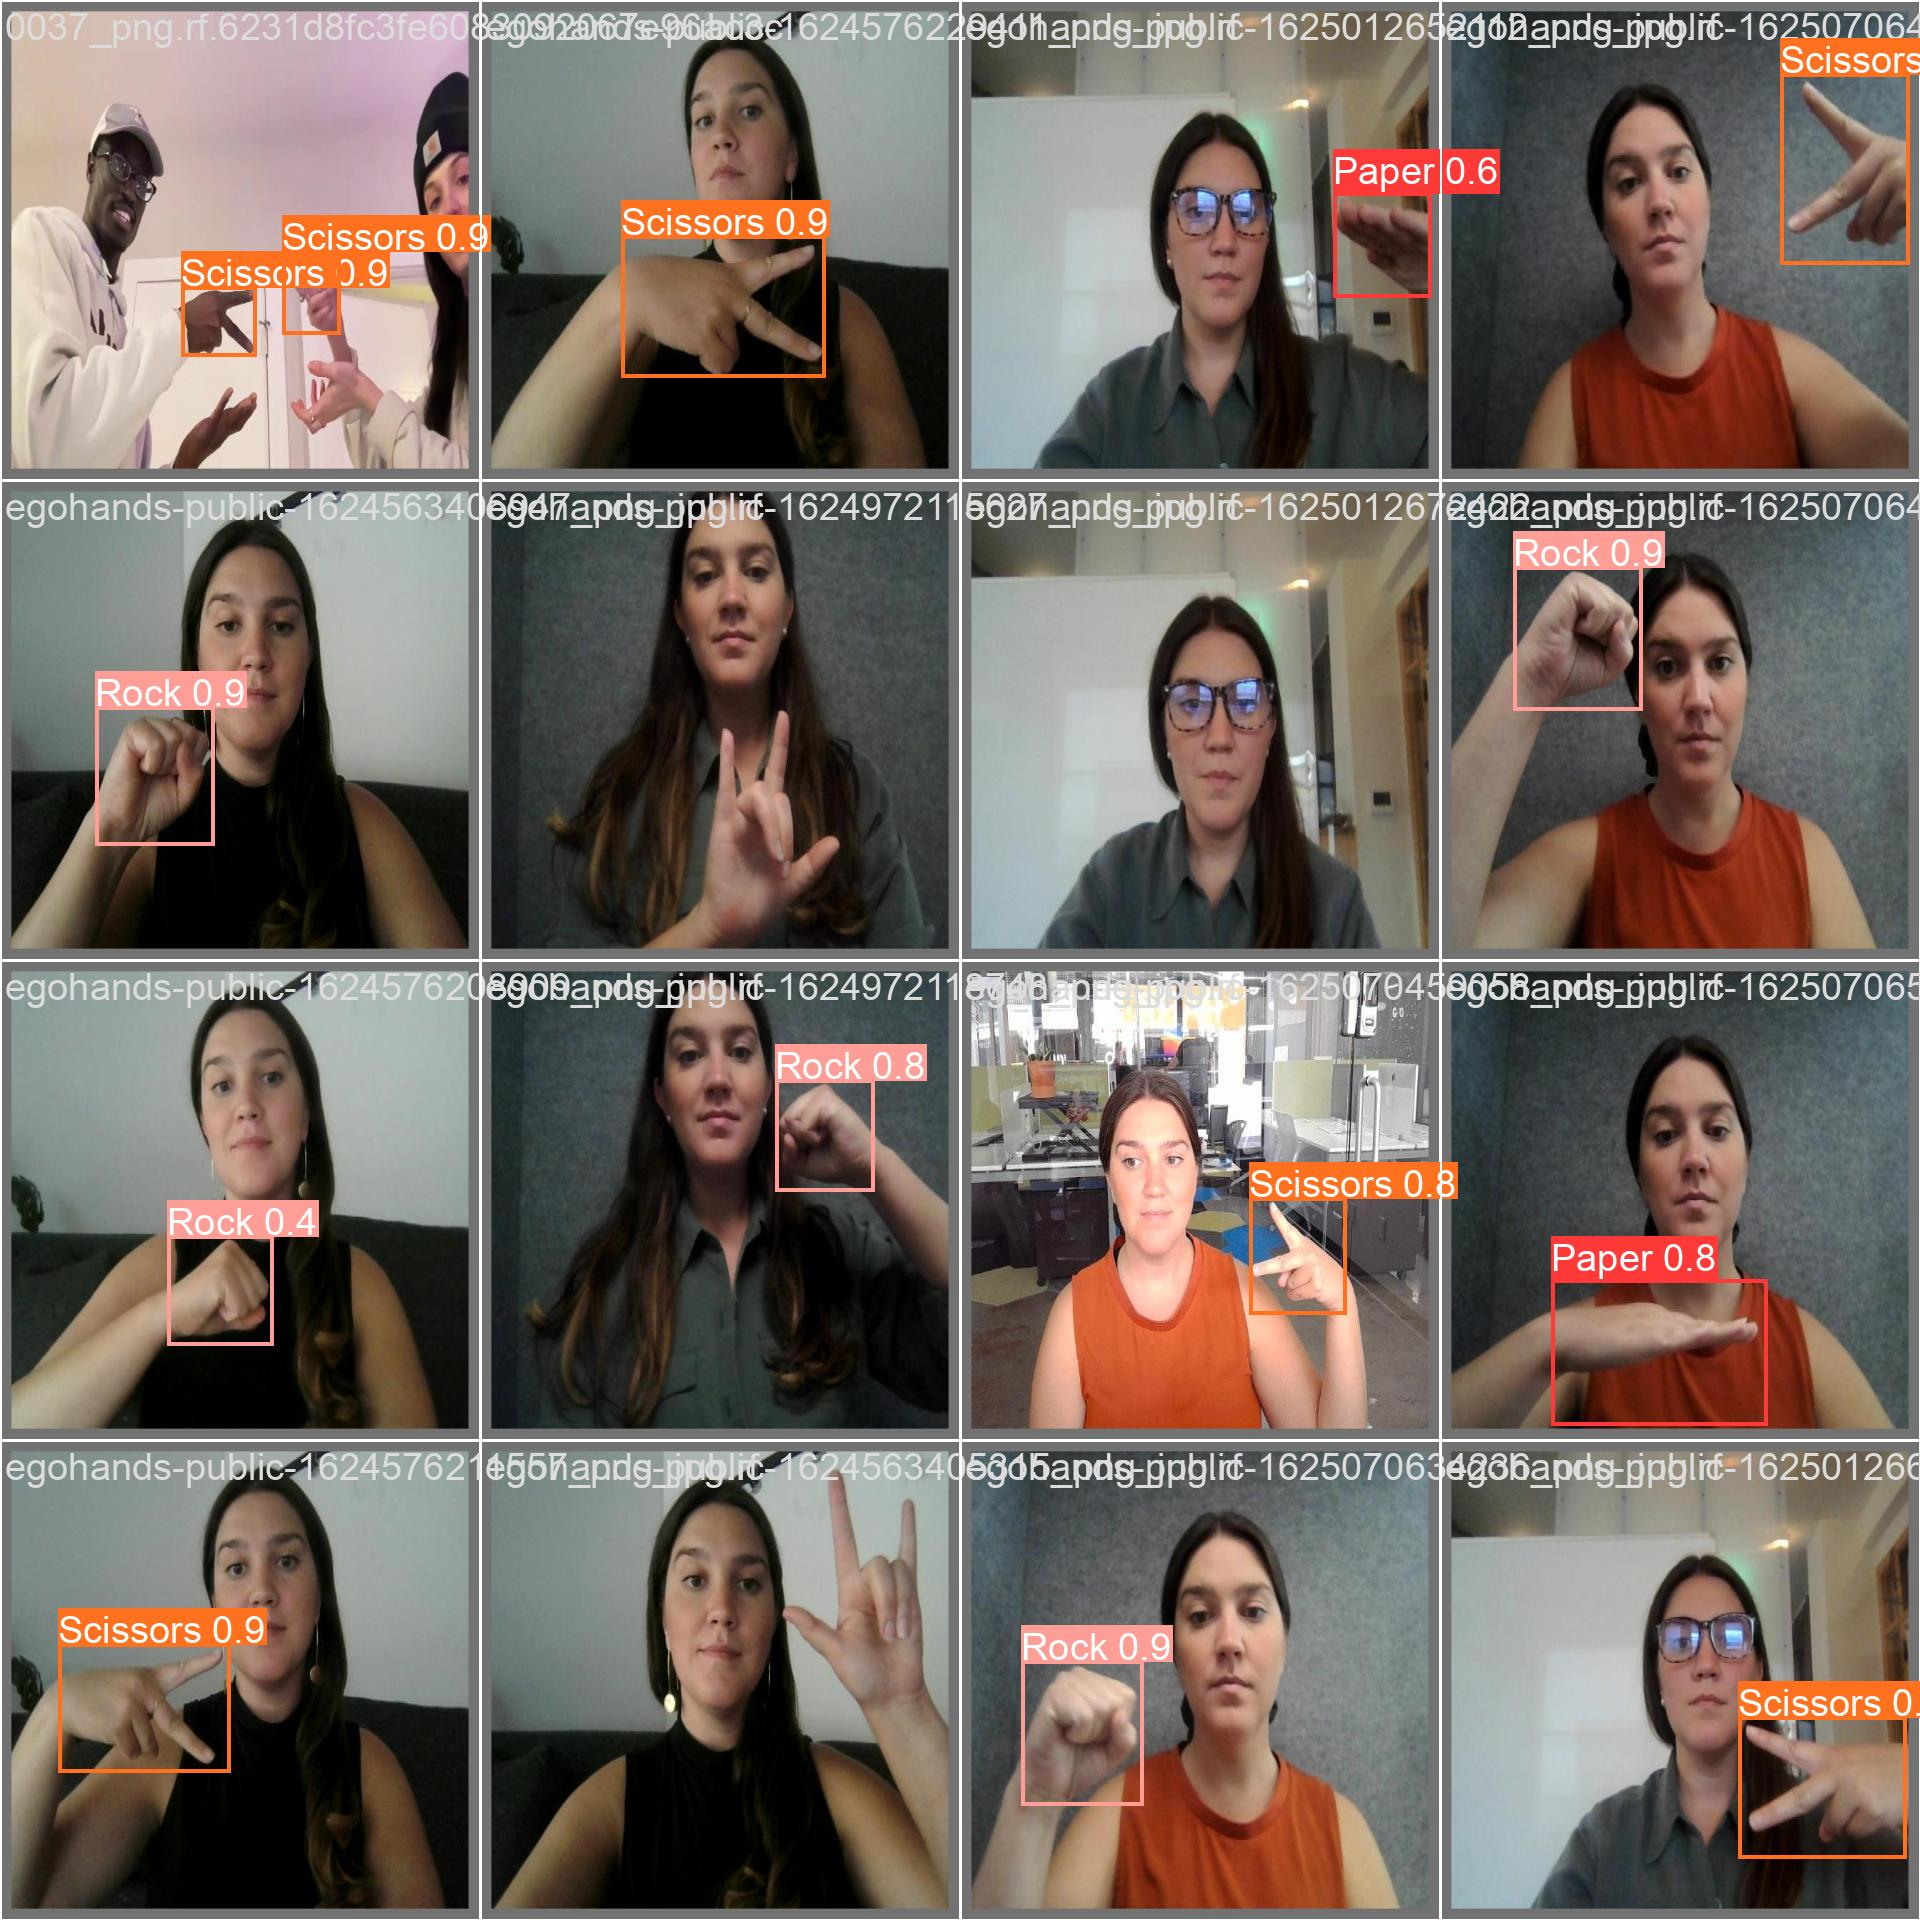

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Evaluate the Model on Validation Set


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8037282 parameters, 0 gradients, 24.5 GFLOPs
val: Scanning /content/datasets/rock-paper-scissors-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100% 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:10<00:00,  3.51it/s]
                   all        576        400      0.939      0.867      0.945      0.732
                 Paper        576        139      0.921      0.842      0.939      0.721
                  Rock        576        141      0.934        0.9      0.956       0.74
              Scissors        576        120      0.962      0.858       0.94      0.735
Speed: 2.3ms preprocess, 10.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Predict on Test Images


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8037282 parameters, 0 gradients, 24.5 GFLOPs

image 1/304 /content/datasets/rock-paper-scissors-14/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 16.8ms
image 2/304 /content/datasets/rock-paper-scissors-14/test/images/15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 640x640 (no detections), 16.8ms
image 3/304 /content/datasets/rock-paper-scissors-14/test/images/19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 640x640 (no detections), 16.7ms
image 4/304 /content/datasets/rock-paper-scissors-14/test/images/20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 640x640 (no detections), 16.7ms
image 5/304 /content/datasets/rock-paper-scissors-14/test/images/20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 640x640 1 Scissors, 16.7ms
image 6/304 /content/datasets/rock-paper

# Display Prediction Results


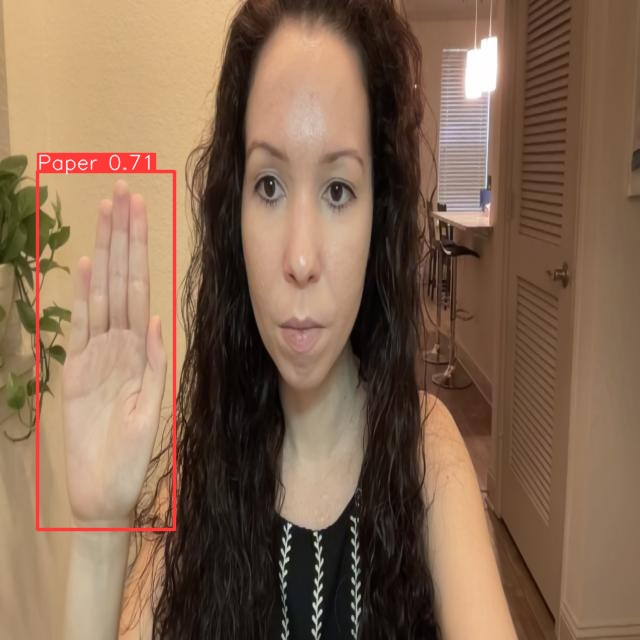

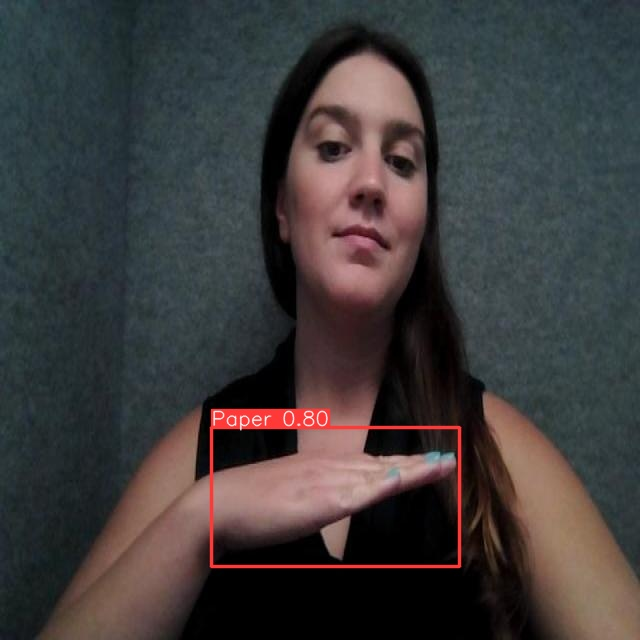

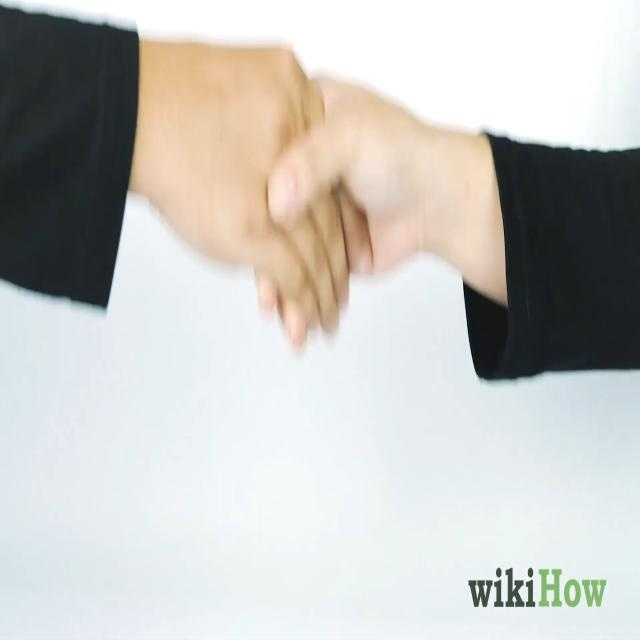

In [ ]:
# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# Predict on a Single Image


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/RPS0.jpg' save=True

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv10s summary (fused): 293 layers, 8037282 parameters, 0 gradients, 24.5 GFLOPs

image 1/1 /content/RPS0.jpg: 384x640 1 Rock, 1 Scissors, 386.0ms
Speed: 7.1ms preprocess, 386.0ms inference, 28.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Display Single Image Prediction


/content


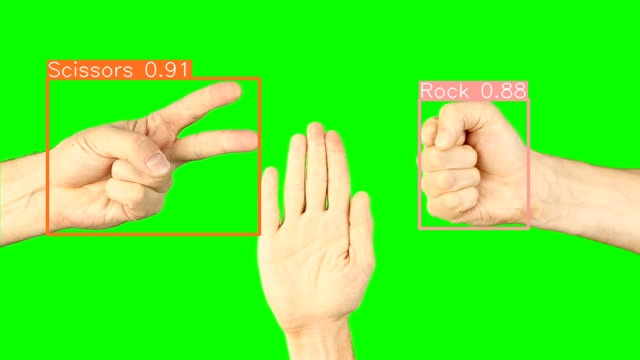

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict4/RPS0.jpg', height=300)

# Define Paths for Model and Video


In [ ]:
model_path = f'/{HOME}/runs/detect/train/weights/best.pt'
video_path = f'{HOME}/RPS0.mp4'
output_path = f'{HOME}/RPS0_detected.mp4'

# Display Model Path


In [ ]:
model_path

'//content/runs/detect/train/weights/best.pt'

# Initialize Video Capture and Writer


In [ ]:
cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 30.0, (int(cap.get(3)), int(cap.get(4))))

# Process Video Frames and Save Results


In [ ]:
# Define class names
class_names = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}

# Process Video Frames and Display Results
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

frame_counter = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_counter += 1

    print(f'percentage of frames: {(frame_counter / total_frames)*100}')

    model = YOLOv10(model_path)
    results = model(frame)

    for box in results[0].boxes:
        conf = box.conf
        cls = box.cls

        # Get class name from class_names dictionary
        class_name = class_names[int(cls.item())]

        label = f'class: {class_name} / conf: {conf.item():.2f}'
        cv2.rectangle(frame, (int(box.xyxy[0][0].item()), int(box.xyxy[0][1].item())), (int(box.xyxy[0][2].item()), int(box.xyxy[0][3].item())), (255, 0, 0), 2)
        cv2.putText(frame, label, (int(box.xyxy[0][0].item()), int(box.xyxy[0][1].item()) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        out.write(frame)

    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

cap.release()
out.release()


percentage of frames: 0.1694915254237288

0: 384x640 (no detections), 638.2ms
Speed: 4.9ms preprocess, 638.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
percentage of frames: 0.3389830508474576

0: 384x640 (no detections), 448.1ms
Speed: 6.1ms preprocess, 448.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
percentage of frames: 0.5084745762711864

0: 384x640 (no detections), 410.7ms
Speed: 4.0ms preprocess, 410.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
percentage of frames: 0.6779661016949152

0: 384x640 (no detections), 413.2ms
Speed: 3.7ms preprocess, 413.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
percentage of frames: 0.847457627118644

0: 384x640 (no detections), 395.0ms
Speed: 5.3ms preprocess, 395.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
percentage of frames: 1.0169491525423728

0: 384x640 (no detections), 389.4ms
Speed: 3.9ms preprocess, 389.4ms inference,

# Display Selected Frames from Saved Video


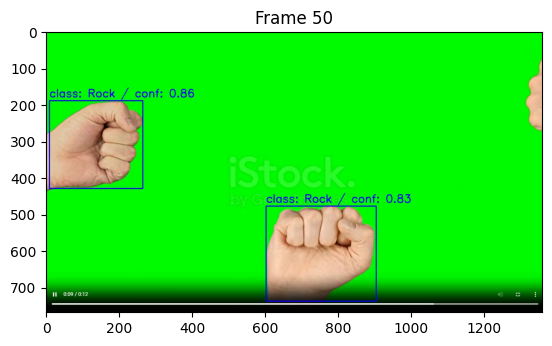

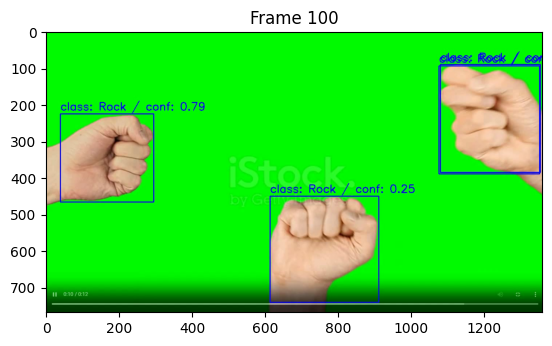

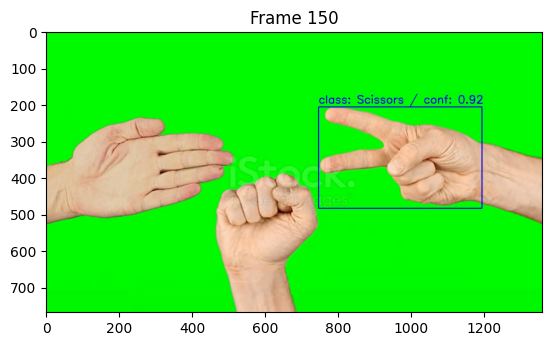

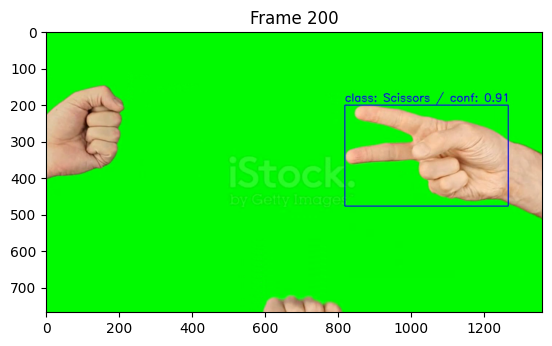

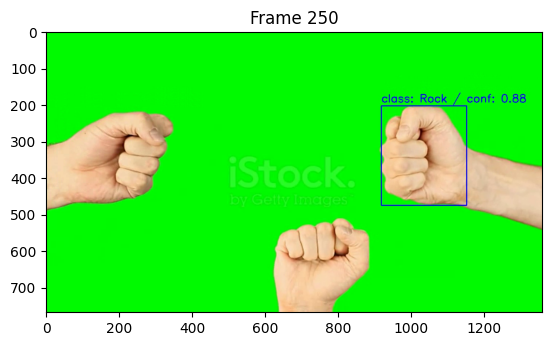

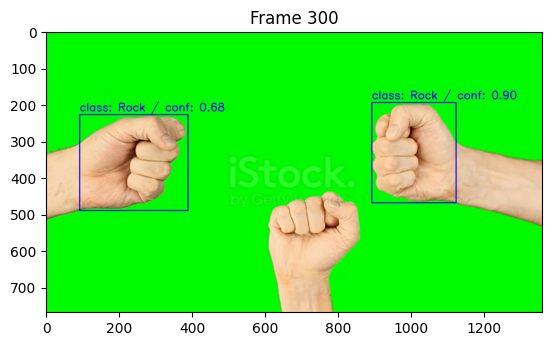

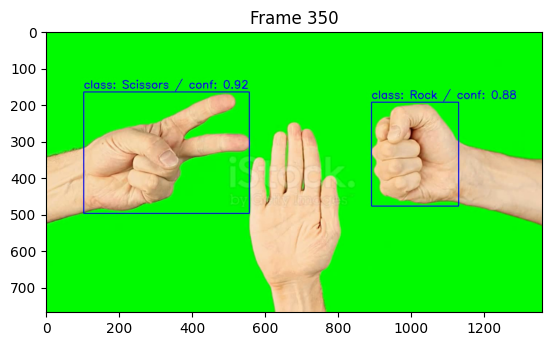

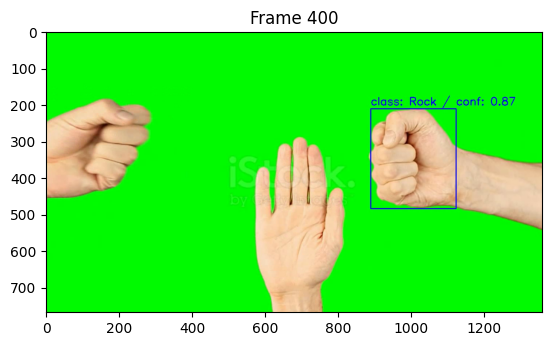

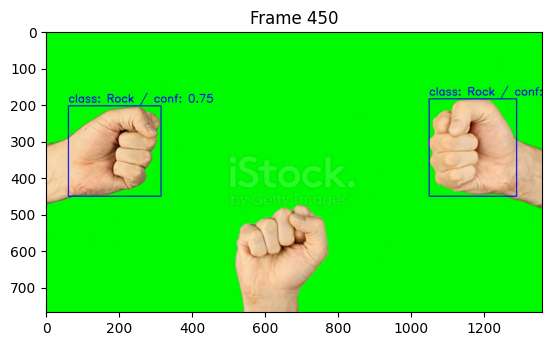

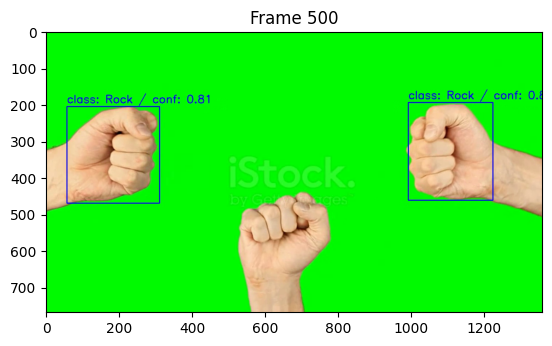

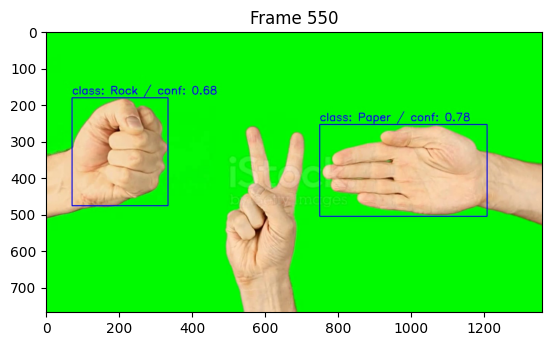

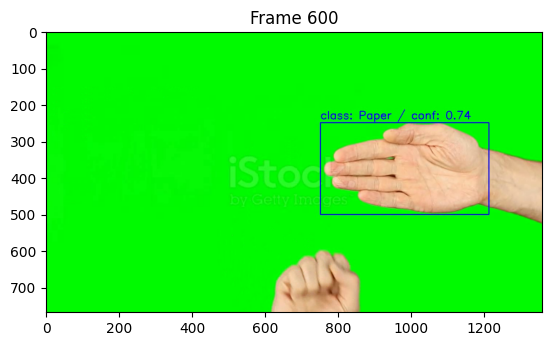

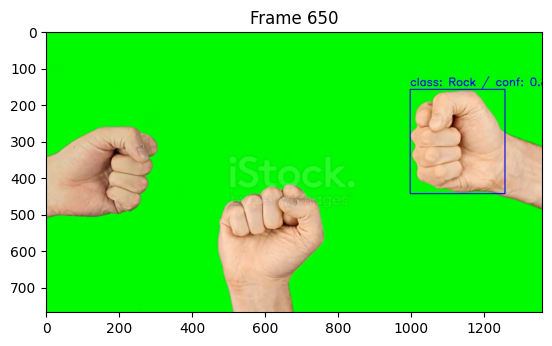

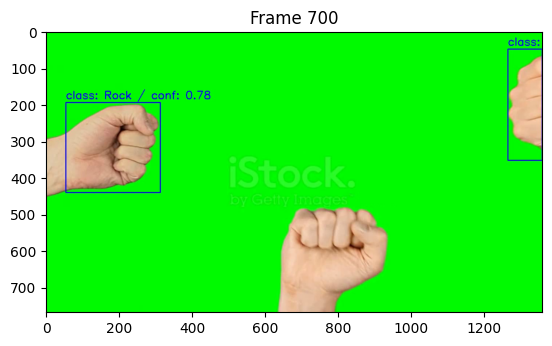

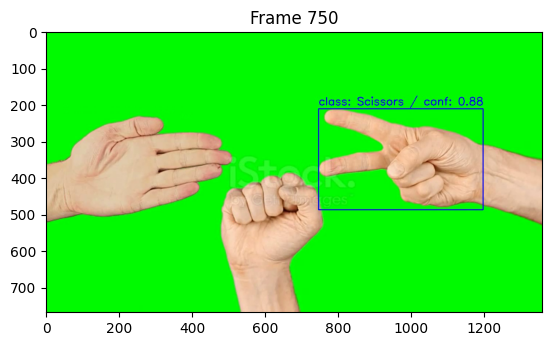

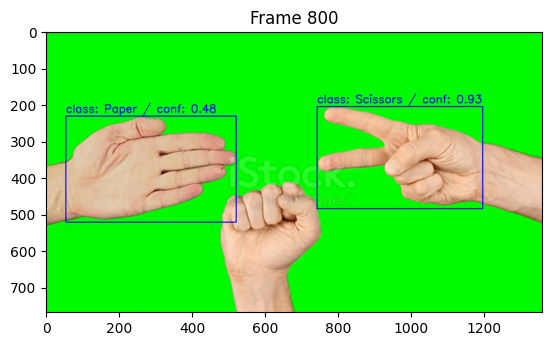

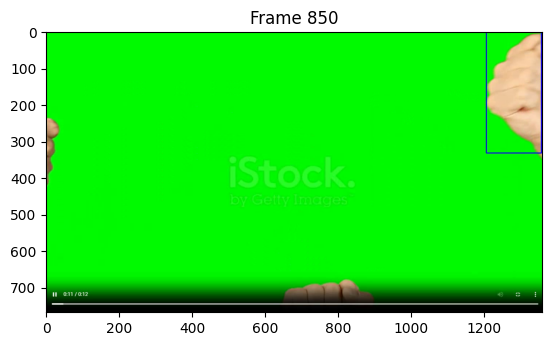

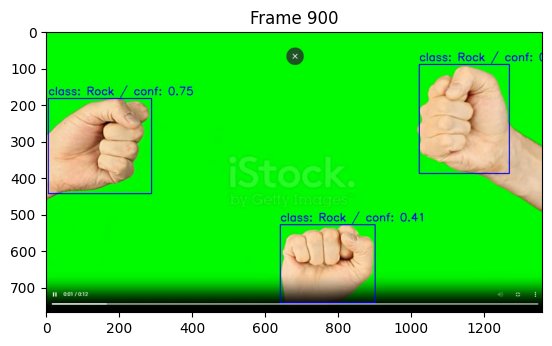

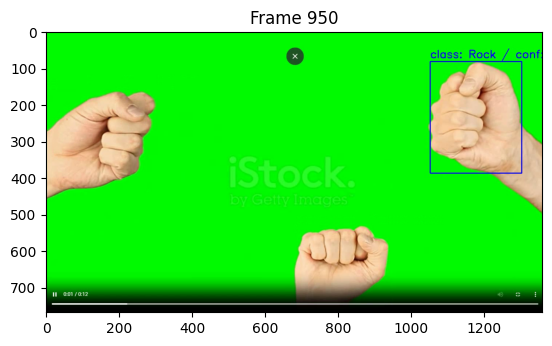

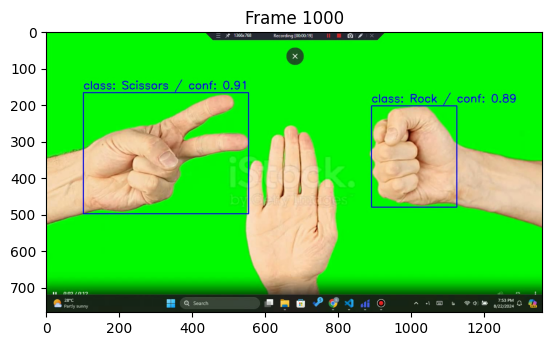

In [ ]:
# Path to the saved video
video_path = f'{HOME}/RPS0_detected.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the frames to display
frames_to_display = []

for i in range(length):
  if i % 50 == 0:
    frames_to_display.append(i)

frame_counter = 0
displayed_frames = 0

while cap.isOpened() and displayed_frames < len(frames_to_display):
    ret, frame = cap.read()
    if not ret:
        break
    frame_counter += 1

    if frame_counter in frames_to_display:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f'Frame {frame_counter}')
        plt.show()
        displayed_frames += 1

cap.release()


In [ ]:
# The End